In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
directory = '../data/'
output_dir = '../data/csv_grouped_data'

In [3]:
df = pd.read_csv(directory + "stocks_and_sentiment_2020.csv", sep=";", names=['date','sentiment','price'], encoding="ISO-8859-1")
df = df.iloc[:, 1:3]
df.head()
df_diff = df.copy()
df_diff["sentiment_diff"] = df["sentiment"].diff()
df_diff = df_diff.dropna()
df_diff = df_diff[["sentiment_diff", "price"]]
df_diff

,sentiment_diff,price
1,0.106048,-0.406118
2,0.034897,-0.227804
3,-0.049815,-0.386955
4,-0.237259,0.130323
5,0.184395,-0.101626
...,...,...
99,-0.055513,0.628993
100,0.105105,0.736907
101,-0.026628,0.800881
102,0.011612,-1.047923


In [9]:
filename_asoc = "../data/grouped_data_day_mean_tweets_sentimentdata-scraper_asociaciones_peru-2016-2020.csv"
filename_empresas ="../data/grouped_data_day_mean_tweets_sentimentdata-scraper_empresas_peru_2017-2020.csv"
filename_precios_bolsa = "../data/pe_bvl_mean_day.csv"

df_asoc = pd.read_csv(filename_asoc, sep=";")
df_empresas = pd.read_csv(filename_empresas, sep=";")
df_precios_bolsa = pd.read_csv(filename_precios_bolsa, sep=";")

df_total = pd.merge(left=df_asoc, right=df_empresas, left_on='normalised_date', right_on='normalised_date')
df_total = df_total.rename(columns={"sentiment_x": "sentiment_asociacones", "sentiment_y": "sentiment_empresas"})
df_total["normalised_date"]= pd.to_datetime(df_total["normalised_date"]) 
df_total = df_total[["normalised_date","sentiment_asociacones", "sentiment_empresas"]]

df_precios_bolsa = df_precios_bolsa[["date", "price_change"]]
df_precios_bolsa["date"]= pd.to_datetime(df_precios_bolsa["date"]) 
df_total = pd.merge(left=df_total, right=df_precios_bolsa, left_on='normalised_date', right_on='date')

df_total.sentiment_asociacones = df_total.sentiment_asociacones.diff()
df_total.sentiment_empresas = df_total.sentiment_empresas.diff()
df_total = df_total.dropna()
df_total = df_total.rename(columns={"price_change": "peru_change"})
df_total['sentiment_asociacones'] = df_total['sentiment_asociacones'].astype(float)
df_total['sentiment_empresas'] = df_total['sentiment_empresas'].astype(float)
df_total['peru_change'] = df_total['peru_change'].astype(float)

df_tota_no_covid = df_total.copy

df_tota_no_covid = df_total[:-100]
df_total.to_csv("df_total_pe.csv", sep=";")
df_tota_no_covid


,normalised_date,sentiment_asociacones,sentiment_empresas,date,peru_change
1,2017-03-01,-0.015294,0.105405,2017-03-01,-1.242825
2,2017-03-02,-0.049415,-0.051242,2017-03-02,-0.395745
3,2017-03-03,0.162448,0.090944,2017-03-03,-2.106603
4,2017-03-06,-0.041206,-0.154455,2017-03-06,-0.668194
5,2017-03-07,-0.058503,0.095434,2017-03-07,-0.817405
...,...,...,...,...,...
711,2019-12-30,-0.034066,-0.002503,2019-12-30,-0.178584
712,2019-12-31,0.299061,0.038512,2019-12-31,0.864454
713,2020-01-02,-0.353609,0.021565,2020-01-02,-0.772431
714,2020-01-03,0.015198,-0.033332,2020-01-03,-0.406118


In [5]:

plt.plot(df_)


NameError: name 'df_' is not defined

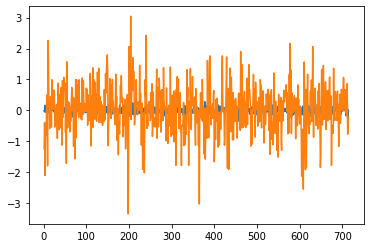

In [6]:
plt.plot(df_tota_no_covid[["sentiment_asociacones", "peru_change"]])


In [8]:
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df, maxlag=2, verbose=True)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2701  , p=0.2633  , df_denom=76, df_num=1
ssr based chi2 test:   chi2=1.3370  , p=0.2476  , df=1
likelihood ratio test: chi2=1.3259  , p=0.2495  , df=1


ValueError: wrong shape for coefs

In [30]:


start_date = "2020-01-10 00:00:00.000"
end_date = "2020-06-01 00:00:00.000"

mask = (df_total['normalised_date'] > start_date) & (df_total['normalised_date'] <= end_date)
df_restricted = df_total.copy()
df_restricted = df_restricted.loc[mask]
print(df_restricted)


granger_test = sm.tsa.stattools.grangercausalitytests(df_restricted[["sentiment_asociacones", "peru_change"]], maxlag=2, verbose=True)
print(granger_test)

granger_test = sm.tsa.stattools.grangercausalitytests(df_restricted[["sentiment_empresas", "peru_change"]], maxlag=2, verbose=True)
print(granger_test)


normalised_date  sentiment_asociacones  sentiment_empresas       date  \
720      2020-01-13               0.107712            0.057996 2020-01-13   
721      2020-01-14              -0.096845           -0.032447 2020-01-14   
722      2020-01-15               0.061376           -0.045345 2020-01-15   
723      2020-01-16              -0.111469            0.055035 2020-01-16   
724      2020-01-17               0.066688            0.136674 2020-01-17   
..              ...                    ...                 ...        ...   
811      2020-05-22              -0.048515            0.011398 2020-05-22   
812      2020-05-25               0.025278           -0.043328 2020-05-25   
813      2020-05-26               0.020805           -0.040025 2020-05-26   
814      2020-05-27               0.006166            0.090178 2020-05-27   
815      2020-05-28              -0.060236           -0.011757 2020-05-28   

     peru_change  
720     0.262752  
721     0.298582  
722     0.320586  
723

In [23]:
granger_test = sm.tsa.stattools.grangercausalitytests(df_tota_no_covid[["sentiment_asociacones", "peru_change"]], maxlag=2, verbose=True)
print(granger_test)

granger_test = sm.tsa.stattools.grangercausalitytests(df_tota_no_covid[["sentiment_empresas", "peru_change"]], maxlag=2, verbose=True)
print(granger_test)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4616  , p=0.4971  , df_denom=671, df_num=1
ssr based chi2 test:   chi2=0.4637  , p=0.4959  , df=1
likelihood ratio test: chi2=0.4635  , p=0.4960  , df=1
parameter F test:         F=0.4616  , p=0.4971  , df_denom=671, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1951  , p=0.8228  , df_denom=668, df_num=2
ssr based chi2 test:   chi2=0.3932  , p=0.8215  , df=2
likelihood ratio test: chi2=0.3931  , p=0.8216  , df=2
parameter F test:         F=0.1951  , p=0.8228  , df_denom=668, df_num=2
{1: ({'ssr_ftest': (0.46163307036183787, 0.497096048190268, 671.0, 1), 'ssr_chi2test': (0.4636970036123379, 0.49590122323945673, 1), 'lrtest': (0.4635375701218436, 0.4959753093161797, 1), 'params_ftest': (0.46163307036189316, 0.49709604819023323, 671.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1324b06d0>, <statsmodels.regression.linear_model.RegressionR

In [27]:
# Split data
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]
# Check for stationarity with Augmented Dickey-Fuller Test (ADF Test)
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(df_train["sentiment"])
adf_test(df_train["price"])
df_train

adf_test(df_total["sentiment"])


NameError: name 'df' is not defined

In [7]:
# Split data
nobs = 4
df_train, df_test = df_diff[0:-nobs], df_diff[-nobs:]
# Check for stationarity with Augmented Dickey-Fuller Test (ADF Test)
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(df_train["sentiment_diff"])
adf_test(df_train["price"])

Test Statistic         -6.201134e+00
p-value                 5.803617e-08
# Lags                  5.000000e+00
# Observations          9.300000e+01
Critical Value (1%)    -3.502705e+00
Critical Value (5%)    -2.893158e+00
Critical Value (10%)   -2.583637e+00
dtype: float64
 Series is Stationary
Test Statistic         -1.154040e+01
p-value                 3.646454e-21
# Lags                  0.000000e+00
# Observations          9.800000e+01
Critical Value (1%)    -3.498910e+00
Critical Value (5%)    -2.891516e+00
Critical Value (10%)   -2.582760e+00
dtype: float64
 Series is Stationary


In [12]:
# Split data
nobs = 4
# Check for stationarity with Augmented Dickey-Fuller Test (ADF Test)
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series

adf_test(df_total["sentiment_asoc"])
adf_test(df_total["sentiment_empresas"])

Test Statistic          -4.624649
p-value                  0.000116
# Lags                   3.000000
# Observations          76.000000
Critical Value (1%)     -3.519481
Critical Value (5%)     -2.900395
Critical Value (10%)    -2.587498
dtype: float64
 Series is Stationary
Test Statistic          -3.814950
p-value                  0.002758
# Lags                   7.000000
# Observations          72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64
 Series is Stationary


In [10]:
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# Fit the model
model = VAR(df)
results = model.fit(maxlags=15, ic='aic')
results.summary()

# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# Fit the model
model_no_covid = VAR(df_tota_no_covid[["sentiment_asociacones","sentiment_empresas","peru_change"]])
results_no_covid = model_no_covid.fit(maxlags=15, ic='aic')
results_no_covid.summary()


/Users/hugojosebello/.local/share/virtualenvs/twitter-data-scripts-analysis-AIss9UM-/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, Jun, 2020
Time:                     15:00:30
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -10.8166
Nobs:                     704.000    HQIC:                  -11.2217
Log likelihood:           1145.05    FPE:                1.03699e-05
AIC:                     -11.4768    Det(Omega_mle):     9.00167e-06
--------------------------------------------------------------------
Results for equation sentiment_asociacones
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                            -0.000716         0.002562           -0.279           0.780
L1.sentiment_asociacones         -0.834905         0.038766          -21.537           0.

In [38]:
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# Fit the model
df_train = df_diff.iloc[:-1]

model = VAR(df_train)

results = model.fit(maxlags=15, ic='aic')
print(results.summary())

df_train = df_diff_since_2017.iloc[:-1]

model = VAR(df_train)

results = model.fit(maxlags=15, ic='aic')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 14, Jun, 2020
Time:                     15:04:26
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.36074
Nobs:                     97.0000    HQIC:                  -2.70858
Log likelihood:          -110.456    FPE:                  0.0527211
AIC:                     -2.94470    Det(Omega_mle):       0.0425286
--------------------------------------------------------------------
Results for equation sentiment_diff
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.004427         0.011388           -0.389           0.697
L1.sentiment_diff        -0.479660         0.114811           -4.178           0.000
L1.price                 -0.007729 

/Users/hugojosebello/.local/share/virtualenvs/twitter-data-scripts-analysis-AIss9UM-/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hugojosebello/.local/share/virtualenvs/twitter-data-scripts-analysis-AIss9UM-/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
 lag_order = results.k_ar
 input = df_diff.values[-lag_order:]
 print(input.shape)
 print(input,lag_order)
 print(results.forecast(input, 1))
 print(df_diff.iloc[-lag_order -1:])

(15, 2)
[[-3.10165830e-02  1.34812590e+00]
 [-6.75725820e-02 -2.60437238e+00]
 [-4.36852800e-03 -6.33252353e-01]
 [ 2.42921700e-01  7.30855404e-01]
 [-5.33173830e-02  4.03321860e+00]
 [-4.65474570e-02 -1.75366996e+00]
 [-5.32068920e-02  5.42107076e-01]
 [-1.51791500e-03 -2.22379707e-01]
 [ 7.69561870e-02 -1.11049139e+00]
 [-1.66826760e-02  5.38966347e-01]
 [-5.55129290e-02  6.28993362e-01]
 [ 1.05104994e-01  7.36906632e-01]
 [-2.66281600e-02  8.00881198e-01]
 [ 1.16117630e-02 -1.04792342e+00]
 [-9.59654170e-02  1.39561073e+00]] 15
[[-0.01708215 -0.08802498]]
     sentiment_diff     price
88        -0.095367 -1.704980
89        -0.031017  1.348126
90        -0.067573 -2.604372
91        -0.004369 -0.633252
92         0.242922  0.730855
93        -0.053317  4.033219
94        -0.046547 -1.753670
95        -0.053207  0.542107
96        -0.001518 -0.222380
97         0.076956 -1.110491
98        -0.016683  0.538966
99        -0.055513  0.628993
100        0.105105  0.736907
101       -0.02

In [11]:

# convert to (records, timesteps, indicators)
def create_window_data_arrays(arrays,window_size):
    data = np.column_stack((arrays))
    arr_len = len(arrays[0])
    windows = np.array([data[i-window_size: i] for i in range(window_size +1,arr_len+1)])
    return windows


def create_window_data_array_with_shift(array,window_size, shift):
    return np.array([array[i-window_size: i] for i in range(shift +1,len(array)+1)])

In [40]:
lag_order = results.k_ar
print(df.values.shape)
train_x = create_window_data_arrays((df_diff_since_2017.sentiment_diff,df_diff_since_2017.sentiment_diff_empresas, df_diff_since_2017.price), lag_order)
print(train_x.shape)
print(train_x[-1])
print("----")
print(df_diff.values[-1])
print("----")
print(results.forecast(train_x[-1], 1))




(104, 2)
(689, 15, 3)
[[-2.30753271e-01  2.02559771e-02 -1.52650108e-01]
 [ 1.57612000e-01  2.30033983e-01 -1.16650885e+00]
 [-6.74046277e-02 -2.57080876e-01  1.98391256e-01]
 [ 2.72367626e-01  1.81314563e-02  1.05060413e-01]
 [-2.90988305e-01  3.02075575e-02  5.15538873e-01]
 [ 9.32177406e-02 -2.57713882e-02 -4.18365054e-01]
 [-1.48232772e-01  2.43360887e-02  1.02486560e-01]
 [ 1.32494990e-01 -8.47119586e-02  6.78834332e-01]
 [ 4.47212578e-04  2.28063317e-01  6.13141775e-01]
 [-3.67182354e-02 -2.28822894e-01  4.70813815e-01]
 [ 2.75348500e-03  1.23817536e-01 -1.24576709e-02]
 [ 1.10314723e-01  3.21022978e-02  6.56283138e-01]
 [-5.81332759e-02 -9.54202907e-02  1.06324530e+00]
 [-3.20654103e-02  3.57322911e-02  9.87035193e-01]
 [ 3.48288871e-02 -6.22782479e-02  4.77420348e-03]]
----
[-0.09596542  1.39561073]
----
[[-0.07036483  0.08619245  0.23517718]]


[-0.07036483  0.08619245  0.23517718]
(103, 2)
(689, 3)
0.5212730298374717
[[ 0.28082861 -0.08294616]
 [-0.54325689  0.1551109 ]
 [ 0.99009026  0.3569258 ]
 ...
 [ 1.0632453   0.7792613 ]
 [ 0.98703519  0.20719267]
 [ 0.0047742   0.23517718]]


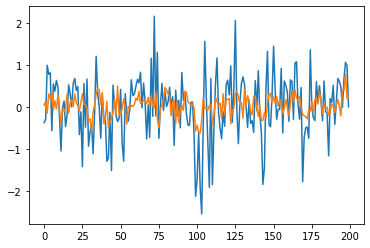

In [43]:
results.forecast(train_x[0], 1)
forecasted = np.array([list(results.forecast(train_x[i], 1)[0]) for i in range(0,train_x.shape[0])])
print(forecasted[-1])

print(df_diff.values.shape)
print(forecasted.shape)

# while using one ts
#y_pred = forecasted[:,1:]
y_pred = forecasted[:,2:]
y_train = df_diff_since_2017.price.values[lag_order:]

M = np.column_stack((y_train, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_train, y_pred))


print(M)
plt.plot(M[-200:])


0.5101921471080604
[[ 0.29283388  0.32090005]
 [ 0.20167447  0.27843018]
 [-0.58933112 -0.07798677]
 ...
 [-0.77243138  0.20821239]
 [-0.40611757 -0.09475495]
 [-0.22780405  0.20953845]]


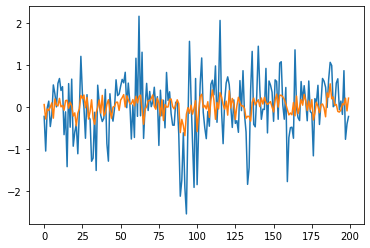

In [12]:

lag_order = results_no_covid.k_ar

train_x = create_window_data_arrays((df_tota_no_covid.sentiment_asociacones, df_tota_no_covid.sentiment_empresas, df_tota_no_covid.peru_change), lag_order)

results_no_covid.forecast(train_x[0], 1)
forecasted = np.array([list(results_no_covid.forecast(train_x[i], 1)[0]) for i in range(0,train_x.shape[0])])


# while using one ts
#y_pred = forecasted[:,1:]
y_pred = forecasted[:,2:]
y_train = df_tota_no_covid.peru_change.values[lag_order:]

M = np.column_stack((y_train, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_train, y_pred))


print(M)
plt.plot(M[-200:])